In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon
from datetime import datetime #<-- note this one is for our time series analysis 


In [4]:
evictions = pd.read_csv('Evictions.csv')
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,51101/18,80697,86 MOTHER GASTON BLV D,3H,11/06/2019,Justin,Grossman,Residential,BROOKLYN,11233,Not an Ejectment,Possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28044/17,110775,1772 EAST 172ND ST,5F,01/17/2018,Maxine,Chevlowe,Residential,BRONX,10472,Not an Ejectment,Possession,40.832769,-73.867842,9.0,18.0,76.0,2098742.0,2.037850e+09,West Farms-Bronx River
2,K68361/16,92930,903 DREW ST,207,05/19/2017,Darlene,Barone,Residential,BROOKLYN,11207,Not an Ejectment,Possession,40.666988,-73.860247,5.0,42.0,1220.0,3331658.0,3.045168e+09,East New York
3,N68844/18,111132,2070 ADAM CLAYTON POWELL BLVD A/K/A 2070 7TH AVE,7B,01/09/2019,Darlene,Barone,Residential,MANHATTAN,10027,Not an Ejectment,Possession,40.807961,-73.949077,10.0,9.0,222.0,1088475.0,1.019290e+09,Central Harlem South
4,52305/17,9929,132-70 SANFORD AVENUE,2A,05/23/2017,Edward,Guida,Residential,QUEENS,11355,Not an Ejectment,Possession,40.755485,-73.831279,7.0,20.0,849.0,4115061.0,4.051010e+09,Flushing


## Question 1
## 1. Describe the data, its structure, data types, formats etc
Data is a csv table describing location, date, type of eviction, and the marshal who comepleted it for all evictions from 2017 to present day. The table has 66,402 rows and 20 columns meaning there are 20 fields for each of the 66,402 evictions that have occured in this time frame. The data type for each field can be seen below, primarily a mix of objects and float64 types. 

In [5]:
evictions.shape

(66402, 20)

In [6]:
evictions.describe()

,Docket Number,Eviction Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,66402.000000,66402.000000,60088.000000,60088.000000,60088.000000,60088.000000,60088.000000,5.997100e+04,5.997100e+04
mean,154596.373904,10792.352715,40.752980,-73.907309,8.008205,23.680585,8497.005575,2.698947e+06,2.622583e+09
std,148934.155878,519.078533,0.091077,0.067737,4.562565,13.662573,21663.030723,1.113010e+06,1.059270e+09
min,103.000000,0.000000,40.499050,-74.251262,1.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,60678.500000,10455.000000,40.672730,-73.943914,4.000000,13.000000,198.000000,2.010366e+06,2.028260e+09
50%,91350.500000,10472.000000,40.754493,-73.909411,8.000000,18.000000,379.000000,2.127481e+06,2.057030e+09
75%,291883.000000,11229.000000,40.836960,-73.870833,12.000000,36.000000,970.750000,3.337062e+06,3.071590e+09
max,496987.000000,12221.000000,40.911588,-73.701430,18.000000,51.000000,157903.000000,5.171959e+06,5.080490e+09


In [7]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

# Question 2
## 2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?

The number of evictions have decreased in recent years. 2017 had the largest number of evictions. 2021 had the smallest number at only 7, followed by 2020 at 3,387. The reason for the huge decrease in 2020 and 2021 is the moratorium on evictions from COVID-19 that has been enforced in many cities across the US. I am curious as to why it went down consistently in 2018 and 2019 as well, I am thinking that may be due to an improving economy at the time since the numbers are not extremely significant but did decrease steadily over those two years. 

In [8]:
#2017
Evictions2017 = evictions[evictions['Executed Date']<= '12/31/2017']
len(Evictions2017)

66397

In [9]:
#2018
Evictions20172018 = evictions[evictions['Executed Date'] <= '12/31/2018']
Evictions2018 = Evictions20172018[Evictions20172018['Executed Date'] >= '01/01/2018']
len(Evictions2018)

66399

In [10]:
#2019
Evictions20172019 = evictions[evictions['Executed Date'] <= '12/31/2019']
Evictions2019 = Evictions20172019[Evictions20172019['Executed Date'] >= '01/01/2019']
len(Evictions2019)

66402

In [11]:
#2020
Evictions20172020 = evictions[evictions['Executed Date'] <= '12/31/2020']
Evictions2020 = Evictions20172020[Evictions20172020['Executed Date'] >= '01/01/2020']
len(Evictions2020)

66402

In [12]:
#2021
Evictions20172021 = evictions[evictions['Executed Date'] <= '12/31/2021']
Evictions2021 = Evictions20172021[Evictions20172021['Executed Date'] >= '01/01/2021']
len(Evictions2021)

66402

# Question 3
## 3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.

The ratio in the entire data is about 0.092. Overall, the ratio hovered around 0.09, between 0.083 and 0.12 in 2020. The bar graph at the bottom shows that the ratio has been increasing over the years. 2021 did not allow for a ratio because residential evictions is at 0 due to the moratorium. The moratorium also caused the ratio to increase because commercial evictions seem to have continued while residential ones were not allowed. 

In [13]:
residential_evictions = len(evictions[evictions['Residential/Commercial'] == 'Residential'])
commercial_evictions = len(evictions[evictions['Residential/Commercial'] == 'Commercial'])

#entire data ratio
ratio_ComRes = commercial_evictions/residential_evictions
print(ratio_ComRes)

0.09197651663405088


In [14]:
residential_evictions2017 = len(Evictions2017[Evictions2017['Residential/Commercial'] == 'Residential'])
commercial_evictions2017 = len(Evictions2017[Evictions2017['Residential/Commercial'] == 'Commercial'])

#2017 data ratio
ratio_ComRes2017 = commercial_evictions2017/residential_evictions2017
print(ratio_ComRes2017)

0.09189429196336069


In [15]:
residential_evictions2018 = len(Evictions2018[Evictions2018['Residential/Commercial'] == 'Residential'])
commercial_evictions2018 = len(Evictions2018[Evictions2018['Residential/Commercial'] == 'Commercial'])

#2018 data ratio
ratio_ComRes2018 = commercial_evictions2018/residential_evictions2018
print(ratio_ComRes2018)

0.09192718183163677


In [16]:
residential_evictions2019 = len(Evictions2019[Evictions2019['Residential/Commercial'] == 'Residential'])
commercial_evictions2019 = len(Evictions2019[Evictions2019['Residential/Commercial'] == 'Commercial'])

#2019 data ratio
ratio_ComRes2019 = commercial_evictions2019/residential_evictions2019
print(ratio_ComRes2019)

0.09197651663405088


In [17]:
residential_evictions2020 = len(Evictions2020[Evictions2020['Residential/Commercial'] == 'Residential'])
commercial_evictions2020 = len(Evictions2020[Evictions2020['Residential/Commercial'] == 'Commercial'])

#2020 data ratio
ratio_ComRes2020 = commercial_evictions2020/residential_evictions2020
print(ratio_ComRes2020)

0.09197651663405088


In [18]:
residential_evictions2021 = len(Evictions2021[Evictions2021['Residential/Commercial'] == 'Residential'])
commercial_evictions2021 = len(Evictions2021[Evictions2021['Residential/Commercial'] == 'Commercial'])

#2021 data ratio
ratio_ComRes2021 = commercial_evictions2021/residential_evictions2021
print(ratio_ComRes2021)

0.09197651663405088


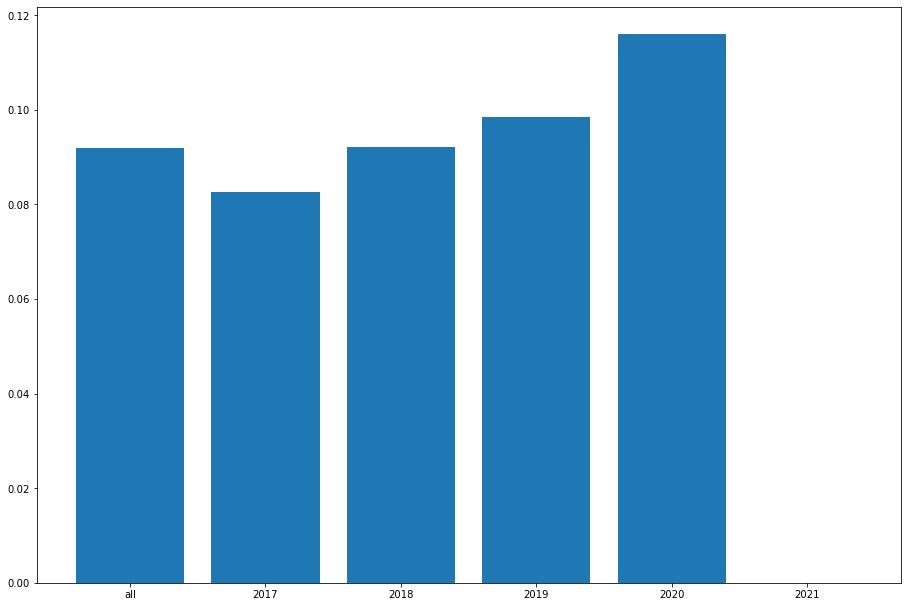

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
year = ['all','2017', '2018', '2019', '2020', '2021']
ratio = [0.09197651663405088,0.0826525708793849, 0.09215529317590554, 0.09849779086892489, 0.11598023064250412, 0]



ax.bar(year,ratio)
plt.show()

# Question 4
## What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?

Justin Grossman        9173
Henry Daley            6487
Ileana Rivera          5842
Thomas Bia             5560
Edward Guida           5422

In [20]:
Marshal = []

Marshal = evictions['Marshal First Name'] + evictions['Marshal Last Name']

evictions['Marshal'] = Marshal

In [21]:
evictions.Marshal.rank()

0        41915.0
1        48207.5
2         9846.5
3         9846.5
4        14422.5
          ...   
66397    26563.0
66398    62818.5
66399    36917.5
66400    41915.0
66401     9846.5
Name: Marshal, Length: 66402, dtype: float64

In [22]:
evictions.Marshal.value_counts()

JustinGrossman        9173
HenryDaley            6487
IleanaRivera          5842
ThomasBia             5560
EdwardGuida           5422
DannyWeinheim         5350
RichardMcCoy          4023
DarleneBarone         3730
GeorgeEssock, Jr.     2661
RobertRenzulli        2403
MaxineChevlowe        1870
RichardCapuano        1870
GaryRose              1557
AlfredLocascio        1425
GeorgeEssock          1417
RonaldPazant          1337
JohnVillanueva         822
VadimBarbarovich       804
KennethGiachetta       771
StevenPowell           757
HowardSchain           713
FrankSiracusa          551
BernardBlake           446
CharlesMarchisotto     394
SalavatoreGiglio       388
BruceKemp              366
JeffreyRose            145
RobertSolimine         118
Name: Marshal, dtype: int64

# Question 5
## How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.

The overall ranking of Boroughs based on the number of evictions stays consistent from 2017 to 2020. The Bronx shows to have the most evictions but has the second lowest population above Staten Island. Following that though, Brooklyn Queens and then Manhattan follow order from largest to smallest population. THe Bronx is alrgely low-income and more residential than the other boroughs which may explain its oddly high number of evictions. 

In [23]:
Evictions2017.BOROUGH.value_counts()

BRONX            22051
BROOKLYN         18831
QUEENS           13177
MANHATTAN        10165
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [24]:
Evictions2018.BOROUGH.value_counts()

BRONX            22051
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10166
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [25]:
Evictions2019.BOROUGH.value_counts()

BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10167
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [26]:
Evictions2020.BOROUGH.value_counts()

BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10167
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

In [27]:
Evictions2021.BOROUGH.value_counts()

BRONX            22053
BROOKLYN         18832
QUEENS           13177
MANHATTAN        10167
STATEN ISLAND     2173
Name: BOROUGH, dtype: int64

# Question 6
## Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.

In [28]:
evictions.NTA.value_counts()

East New York                                 1363
Crown Heights North                           1303
East Concourse-Concourse Village              1227
Central Harlem North-Polo Grounds             1195
Williamsbridge-Olinville                      1186
                                              ... 
Arden Heights                                   25
Rossville-Woodrow                               18
Annadale-Huguenot-Prince's Bay-Eltingville      17
park-cemetery-etc-Queens                         7
park-cemetery-etc-Brooklyn                       6
Name: NTA, Length: 191, dtype: int64

In [29]:
NTA = gpd.read_file('Neighborhood Tabulation Areas (NTA)')

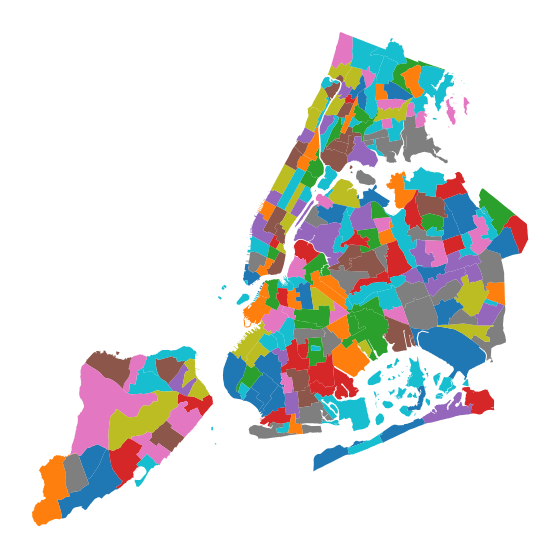

In [30]:
NTA.plot(column='ntaname',legend=False,figsize=(40, 10),markersize=0.1)
plt.axis('off')
plt.show()

In [31]:
evictions['ntaname'] = evictions['NTA']

In [32]:
EvictionsNTA = evictions.ntaname.value_counts()
EvictionsNTA = EvictionsNTA.reset_index()
EvictionsNTA.columns = ['ntaname', 'evictions'] # change column names

EvictionsNTA

,ntaname,evictions
0,East New York,1363
1,Crown Heights North,1303
2,East Concourse-Concourse Village,1227
3,Central Harlem North-Polo Grounds,1195
4,Williamsbridge-Olinville,1186
...,...,...
186,Arden Heights,25
187,Rossville-Woodrow,18
188,Annadale-Huguenot-Prince's Bay-Eltingville,17
189,park-cemetery-etc-Queens,7


In [33]:
EvictionsPerNTA = NTA.merge(EvictionsNTA, on='ntaname')

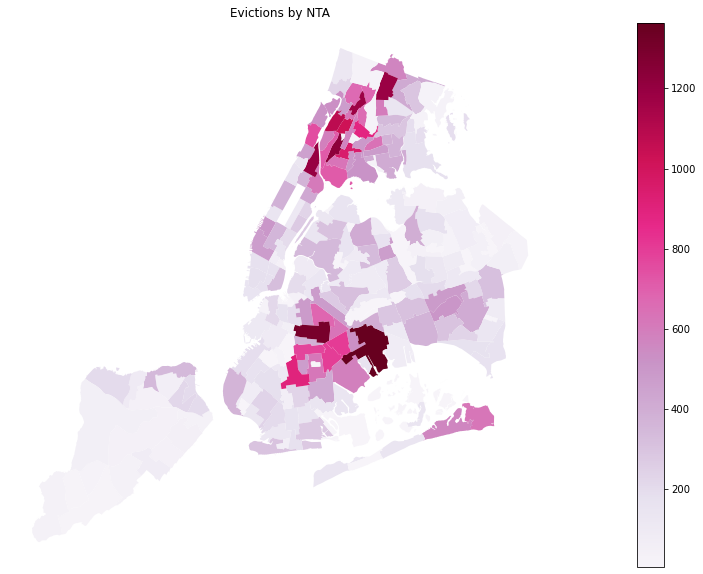

In [34]:
EvictionsPerNTA.plot(column = 'evictions', legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Evictions by NTA')
plt.axis('off')
plt.show()

# Question 7
## Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections

I chose to look at how rent burdened the population is based on ACS housing data about the percentage of household income spent on rent. I focused on the percentage of household who spent 50% or more of their housheold income on rent. I expected that to have a significant correlation with the amount of evictions since failure to pay rent is a common reason for eviction. However, as you can see at the bottom with the maps, there is not a clear relationship. I'm not sure as to why that is, but the dataset noted that some households were not included in the calculation so it's possible the people being evicted have no income or were not represented well in the ACS survey. Source: https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-acs-nta.page

In [35]:
ACShousingData = gpd.read_file('NTA ACS Housing Data')

In [36]:
ACShousingData

,OBJECTID,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,geotype,geogname,geoid,dataset,...,grpi50plP,grpi50plZ,grpintcC,grpintcE,grpintcM,grpintcP,grpintcZ,Shape_Leng,Shape_Area,geometry
0,1,3,Brooklyn,047,BK88,Borough Park,NTA2010,Borough Park,BK88,Y2014-2018,...,50.2,2.6,11.6,977.0,186.0,None,None,39247.227831,5.400502e+07,"POLYGON ((990897.900 169268.121, 990588.252 16..."
1,2,4,Queens,081,QN51,Murray Hill,NTA2010,Murray Hill,QN51,Y2014-2018,...,41.6,4.2,12.9,1103.0,235.0,None,None,33266.904797,5.248828e+07,"POLYGON ((1038593.459 221913.355, 1039369.281 ..."
2,3,4,Queens,081,QN27,East Elmhurst,NTA2010,East Elmhurst,QN27,Y2014-2018,...,42.9,5.0,25.9,189.0,81.0,None,None,19816.711908,1.972685e+07,"POLYGON ((1022728.275 217530.808, 1023052.645 ..."
3,4,4,Queens,081,QN07,Hollis,NTA2010,Hollis,QN07,Y2014-2018,...,34.1,5.9,31.6,140.0,73.0,None,None,20976.335574,2.288777e+07,"POLYGON ((1051539.660 201007.013, 1051920.726 ..."
4,5,1,Manhattan,061,MN06,Manhattanville,NTA2010,Manhattanville,MN06,Y2014-2018,...,32.3,4.6,25.1,356.0,147.0,None,None,17040.685413,1.064708e+07,"POLYGON ((999174.261 238490.105, 999084.570 23..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,191,2,Bronx,005,BX01,Claremont-Bathgate,NTA2010,Claremont-Bathgate,BX01,Y2014-2018,...,31.2,3.4,21.6,455.0,161.0,None,None,30050.115557,1.645395e+07,"POLYGON ((1014572.350 250682.762, 1014489.296 ..."
191,192,2,Bronx,005,BX14,East Concourse-Concourse Village,NTA2010,East Concourse-Concourse Village,BX14,Y2014-2018,...,36.9,2.8,14.8,1022.0,249.0,None,None,27199.911998,1.822164e+07,"POLYGON ((1009266.029 246329.172, 1009255.956 ..."
192,193,2,Bronx,005,BX99,park-cemetery-etc-Bronx,NTA2010,park-cemetery-etc-Bronx,BX99,Y2014-2018,...,27.0,10.7,0.0,0.0,0.0,None,None,223439.425999,2.208390e+08,"MULTIPOLYGON (((1020356.163 236653.068, 102035..."
193,194,4,Queens,081,QN35,Briarwood-Jamaica Hills,NTA2010,Briarwood-Jamaica Hills,QN35,Y2014-2018,...,31.8,3.9,21.2,376.0,131.0,None,None,30029.287357,2.937737e+07,"POLYGON ((1041627.321 198275.486, 1041389.733 ..."


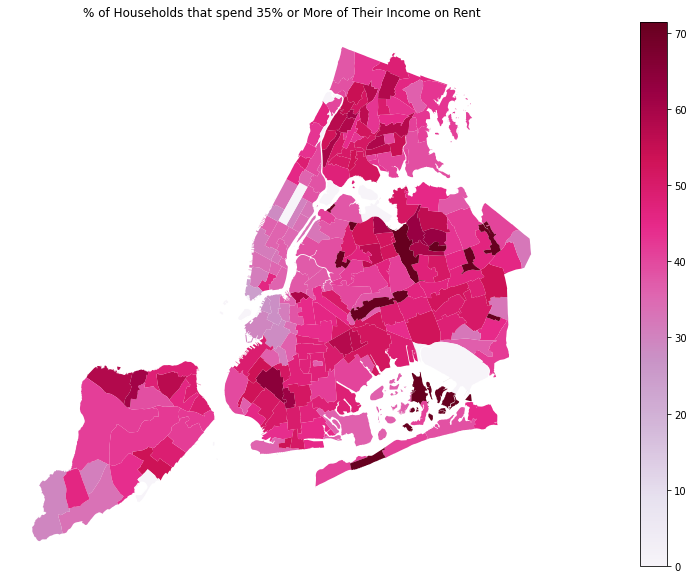

In [37]:
#% of households paying 35% or more of their income in rent
ACShousingData.plot(column='grpi35plP',legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('% of Households that spend 35% or More of Their Income on Rent')
plt.axis('off')
plt.show()

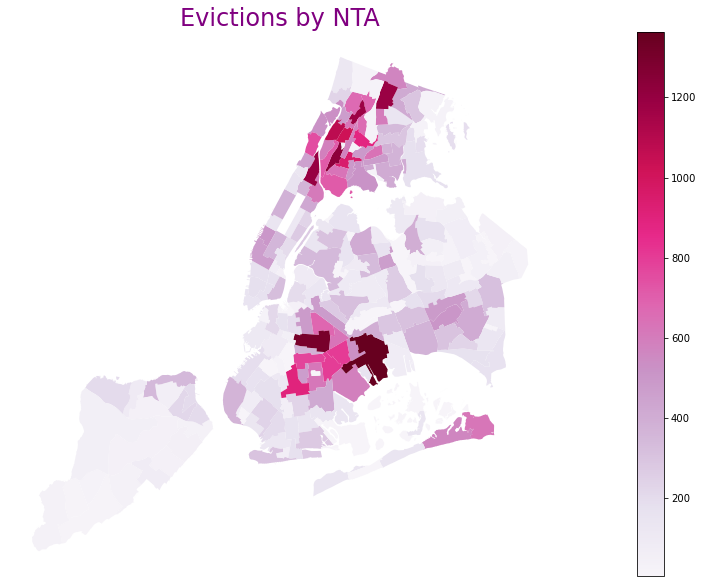

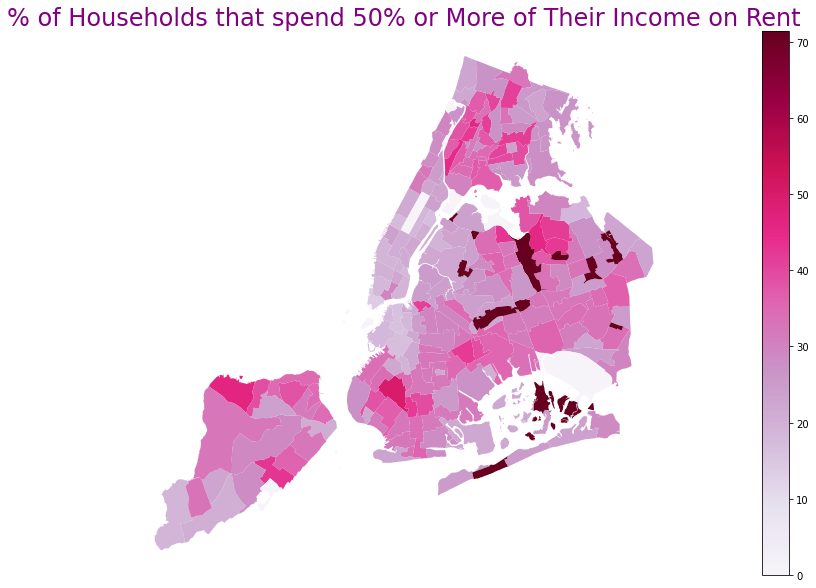

In [39]:
#1.Evictions 
ax1 = EvictionsPerNTA.plot(column = 'evictions', legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('Evictions by NTA', fontsize=24, color ='purple')
plt.axis('off')
plt.show()

#2. severely rent burdened households
ax2 = ACShousingData.plot(column='grpi50plP',legend = True, figsize=(30, 10),cmap='PuRd')

plt.title('% of Households that spend 50% or More of Their Income on Rent', fontsize=24, color ='purple')
plt.axis('off')
plt.show()